<h1 style="color:Maroon;">Bike Sharing Assignment</h1>

In [1]:
# Data manipulation libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Regression model Libraries
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

### Loading and Analysing DataSet

In [2]:
# Loading dataset
bsData = pd.read_csv('day.csv')

# identify number of rows and columns
print("Rows: ",bsData.shape[0],"\nColumns: ",bsData.shape[1])

# Check datatype of each column and the null values in each column
print("\n\nInfo: \n")
bsData.info()

# print top 5 rows
print("\n\n\nTop 5 rows : \n\n")
bsData.head()

Rows:  730 
Columns:  16


Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB



Top 5 rows : 




,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


<p style="color:maroon;font-weight:bold;background-color:yellow;width:max-content;"> 
    None of the column has 'null'/'NaN' value.
</p>

### Analysing and cleaning data

In [3]:
# Do not require the 'instant' column because it is just a id for the records. So dropping this field
bsData.drop(['instant'],axis=1, inplace=True)

# Do not require the 'dteday' column because date information is already present in 'yr' and 'mnth' columns
bsData.drop(['dteday'],axis=1, inplace=True)
bsData.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Checking 'season' column
print("Old season values: \n\n",bsData.season.value_counts())

# As described in the data dictionary 'season' column is a categorical column with below four entries 
# (1:spring, 2:summer, 3:fall, 4:winter)
# Converting numerical entries for 'season' into categories
bsData['season'] = bsData.season.apply(lambda x: {1:'spring',2:'summer',3:'fall',4:'winter'}.get(x))
print("\n\n\nNew season values: \n\n",bsData.season.value_counts())

Old season values: 

 3    188
2    184
1    180
4    178
Name: season, dtype: int64



New season values: 

 fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64


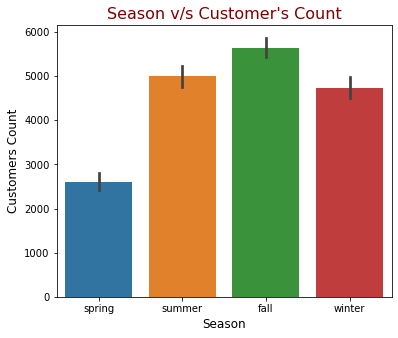

In [5]:
# Check the trend between atemp and cnt variables
fig = plt.figure(figsize=(6,5))
sns.barplot(data=bsData, x="season",y="cnt")
plt.xlabel('Season', fontsize=12)
plt.ylabel('Customers Count', fontsize=12) 
plt.title("Season v/s Customer's Count",fontdict={"fontsize":16,"color":"Maroon"})

plt.show()

In [6]:
# Checking number of unique values in 'yr' column
bsData.yr.value_counts()

# 0 = 2018
# 1 = 2019

0    365
1    365
Name: yr, dtype: int64

In [7]:
# checking number of unique entries in 'mnth' column
print("Old Month entries: \n\n",bsData.mnth.value_counts())

# Month is a categorical variable
# By looking at the data it seems 1 = january and 12 = December
# Converting numerical entries for 'mnth' into categories
bsData['mnth'] = bsData.mnth.apply(lambda x: {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}.get(x))

print("\n\nNew Month entries: \n\n",bsData.mnth.value_counts())

Old Month entries: 

 1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64


New Month entries: 

 January      62
March        62
May          62
July         62
August       62
October      62
December     62
April        60
June         60
September    60
November     60
February     56
Name: mnth, dtype: int64


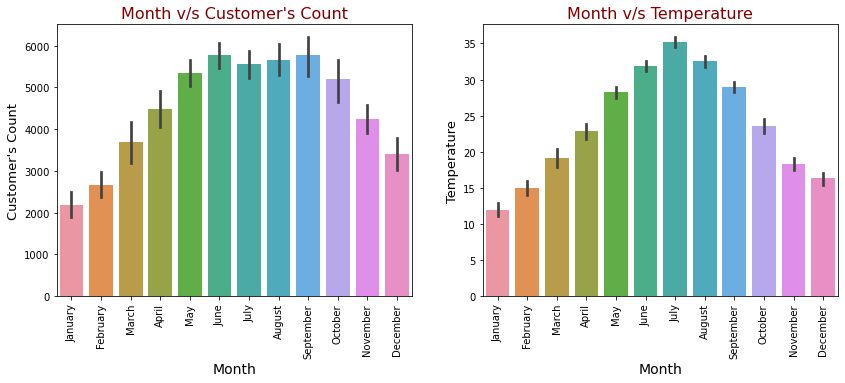

In [8]:
# Check the trend between atemp and cnt variables
fig = plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.barplot(data=bsData, x="mnth",y="cnt")
plt.xlabel('Month', fontsize=14)
plt.ylabel("Customer's Count", fontsize=13) 
plt.xticks(rotation=90)
plt.title("Month v/s Customer's Count",fontdict={"fontsize":16,"color":"Maroon"})


plt.subplot(1,2,2)
sns.barplot(data=bsData, x="mnth",y="atemp")
plt.xlabel('Month', fontsize=14) 
plt.ylabel('Temperature', fontsize=13) 
plt.xticks(rotation=90)
plt.title("Month v/s Temperature",fontdict={"fontsize":16,"color":"Maroon"})

plt.show()

__As the temperature increases around in the middle of the year, bike rental sale also increases__

In [9]:
# checking number of unique entries in 'holiday' column
bsData.holiday.value_counts()

0    709
1     21
Name: holiday, dtype: int64

- Total 21 holidays in 2 years

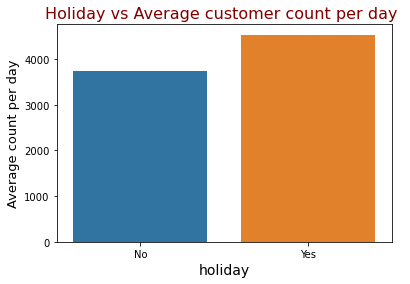

In [10]:
holidays_cnt = bsData[ bsData.holiday == 0 ]["cnt"]
no_holidays_cnt = bsData[ bsData.holiday == 1 ]["cnt"]

avg_holidays_cnt = holidays_cnt.sum() / holidays_cnt.count()
avg_no_holidays_cnt = no_holidays_cnt.sum() / no_holidays_cnt.count()

sns.barplot([0,1], [avg_no_holidays_cnt, avg_holidays_cnt])
plt.xlabel('holiday', fontsize=14) 
plt.ylabel('Average count per day', fontsize=13) 

plt.xticks([0,1],labels=["No","Yes"])
plt.title("Holiday vs Average customer count per day ",fontdict={"fontsize":16,"color":"Maroon"})

plt.show()

__In Holidays number of customer increases compare to workingdays__

In [11]:
# checking number of unique entries in 'weathersit' column
print("Old weathersit values: \n\n",bsData.weathersit.value_counts())

# 'weathersit' is again a categorical variable with numeric values so considering below -
# string values for these numeric quantities
# 1. Clear
# 2. Cloudy
# 3. Light Rain
# 4th one we will not consider because none of the entries has that value

bsData['weathersit'] = bsData.weathersit.apply(lambda x: {1:'clear',2:'cloudy',3:'Light Rain'}.get(x))
print("\n\nNew weathersit values: \n\n",bsData.weathersit.value_counts())

Old weathersit values: 

 1    463
2    246
3     21
Name: weathersit, dtype: int64


New weathersit values: 

 clear         463
cloudy        246
Light Rain     21
Name: weathersit, dtype: int64


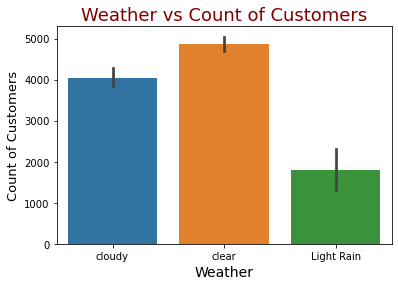

In [12]:
sns.barplot(data=bsData, x='weathersit', y='cnt')
plt.xlabel('Weather', fontsize=14) 
plt.ylabel('Count of Customers', fontsize=13) 
plt.title("Weather vs Count of Customers",fontdict={"fontsize":18,"color":"Maroon"})

plt.show()

* As compare to 'cloudy' and 'clear' weather, 'Light Rain' data is very less

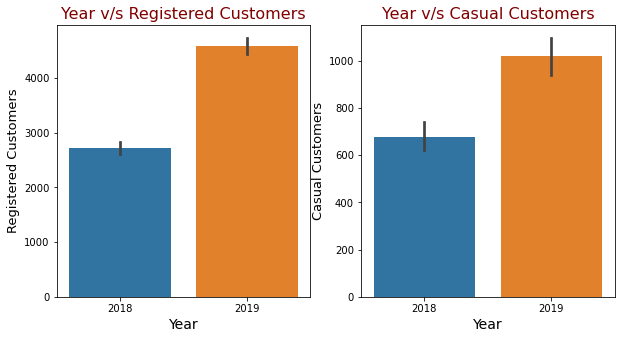

In [13]:
# Check the trend between atemp and registered, casual variables
fig = plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.barplot(bsData.yr,bsData.registered)
plt.xlabel('Year', fontsize=14)
plt.xticks([0,1],labels=[2018,2019])
plt.ylabel('Registered Customers', fontsize=13) 
plt.title("Year v/s Registered Customers",fontdict={"fontsize":16,"color":"Maroon"})


plt.subplot(1,2,2)
sns.barplot(bsData.yr,bsData.casual)
plt.xlabel('Year', fontsize=14) 
plt.ylabel('Casual Customers', fontsize=13) 
plt.xticks([0,1],labels=[2018,2019])
plt.title("Year v/s Casual Customers",fontdict={"fontsize":16,"color":"Maroon"})

plt.show()

__In 2019 both type of customers increased campare to 2018__

### Data Sanitization and Outlier detection

In [14]:
# Checking the Range of numerical data
bsData.describe()

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,2.997260,0.683562,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,0.500343,0.167266,2.006161,0.465405,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,0.000000,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,0.000000,0.000000,1.000000,0.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,0.500000,0.000000,3.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,1.000000,0.000000,5.000000,1.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,1.000000,1.000000,6.000000,1.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


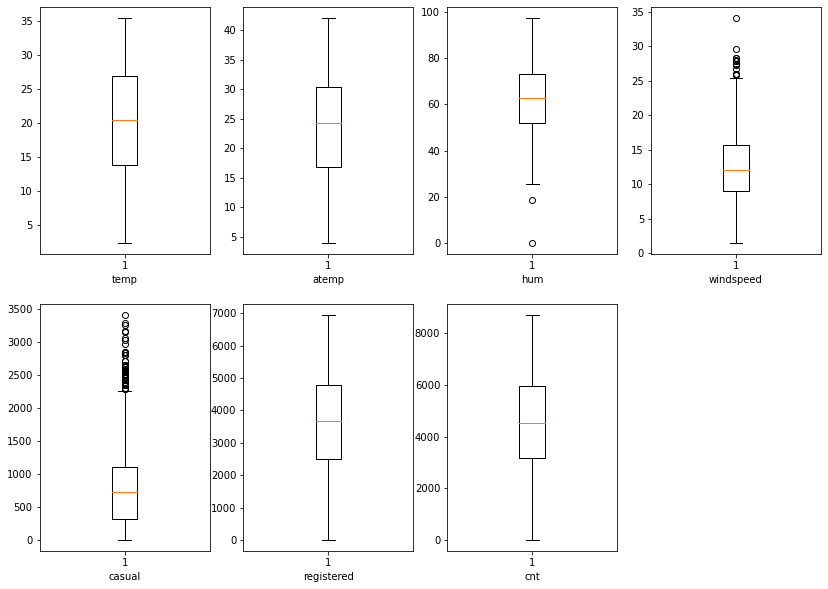

In [15]:
plt.figure(figsize=[14,10])
plt.subplot(2,4,1)
plt.boxplot(bsData.temp)
plt.xlabel("temp")

plt.subplot(2,4,2)
plt.boxplot(bsData.atemp)
plt.xlabel("atemp")

plt.subplot(2,4,3)
plt.boxplot(bsData.hum)
plt.xlabel("hum")

plt.subplot(2,4,4)
plt.boxplot(bsData.windspeed)
plt.xlabel("windspeed")

plt.subplot(2,4,5)
plt.boxplot(bsData.casual)
plt.xlabel("casual")

plt.subplot(2,4,6)
plt.boxplot(bsData.registered)
plt.xlabel("registered")

plt.subplot(2,4,7)
plt.boxplot(bsData.cnt)
plt.xlabel("cnt")

plt.show()

<p style="color:maroon;font-weight:bold;background-color:yellow;width:max-content;">
    Humidity has '0' value for one day which feels suspecious. Needs to check that record<br>
Needs to check windspeed also which has some high values
    </p>

In [16]:
# Checking humidity below 20 mark
bsData[bsData.hum <= 20 ] 

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
49,spring,0,February,0,6,0,clear,16.365847,19.5702,18.7917,34.000021,532,1103,1635
68,spring,0,March,0,4,1,Light Rain,15.952731,19.2834,0.0000,17.545759,46,577,623



<p style="color:maroon;font-weight:bold;background-color:yellow;width:max-content;"> 
    Here on a "rainy day" the data says that humidity is 0. It is definately a invalid record.<br> Need to drop it
</p>

In [17]:
bsData = bsData[ bsData.hum > 0 ]
bsData.shape

(729, 14)

In [18]:
# Checking 'windspeed' for some high values
bsData[bsData.windspeed > 25]

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
44,spring,0,February,0,1,1,clear,17.015000,19.91750,37.5833,27.999836,208,1705,1913
49,spring,0,February,0,6,0,clear,16.365847,19.57020,18.7917,34.000021,532,1103,1635
93,summer,0,April,0,1,1,clear,23.506653,27.14645,42.6250,25.833257,734,2381,3115
94,summer,0,April,0,2,1,cloudy,16.980847,19.91750,64.2083,26.000489,167,1628,1795
238,fall,0,August,0,6,0,cloudy,27.880000,31.77780,85.0000,25.166339,226,889,1115
292,winter,0,October,0,4,1,clear,19.509153,23.32625,63.6250,28.292425,471,3724,4195
377,spring,1,January,0,5,1,clear,11.240847,12.46810,50.7500,25.333236,174,3040,3214
382,spring,1,January,0,3,1,clear,12.436653,13.76270,44.3333,27.833743,109,3267,3376
407,spring,1,February,0,0,0,clear,5.227500,5.08290,46.4583,27.417204,73,1456,1529
420,spring,1,February,0,6,0,clear,11.924153,12.78375,39.5833,28.250014,317,2415,2732


__Nothing suspecious felt about windspeed data__

In [19]:
# Checking 'casual' for some high values
bsData[ bsData.casual > 2500]

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
184,fall,0,July,1,1,0,cloudy,29.793347,33.27085,63.7917,5.459106,3065,2978,6043
246,fall,0,September,0,0,0,clear,29.075847,33.27145,74.2083,13.833289,2521,2419,4940
440,spring,1,March,0,6,0,cloudy,21.080847,25.25230,75.5833,7.417168,3155,4681,7836
461,summer,1,April,0,6,0,clear,17.937500,21.30645,25.4167,18.416357,3252,3605,6857
468,summer,1,April,0,6,0,clear,20.295000,24.39980,50.2917,12.791439,2795,4665,7460
469,summer,1,April,0,0,0,clear,24.873347,28.69375,50.7917,15.083643,2846,4286,7132
475,summer,1,April,0,6,0,clear,23.370000,27.14605,68.2917,19.000329,2541,4083,6624
496,summer,1,May,0,6,0,clear,23.130847,27.24085,48.0417,8.249911,2622,4807,7429
503,summer,1,May,0,6,0,clear,24.600000,28.34540,45.6250,5.626325,3410,4884,8294
504,summer,1,May,0,0,0,clear,25.454153,29.19835,53.0417,17.042589,2704,4425,7129


__Nothing suspecious felt about high values in casual__<br>
__But Yes, number of casual customers increases in 2019 as compared to 2018 as lot of these outliers falls in year 2019__

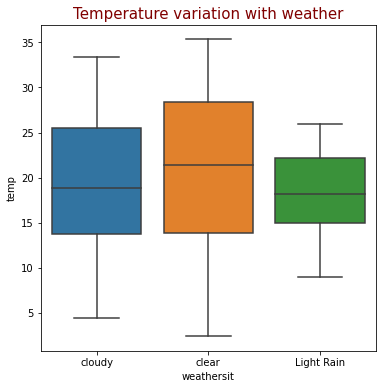

In [20]:
# Comparing temperature with the weather that day
plt.figure(figsize=[6,6])
sns.boxplot(data=bsData, x="weathersit",y='temp')
plt.title("Temperature variation with weather",fontdict={'fontsize': 15,'color':'maroon'})
plt.show()

__Temperature variation with weather seems normal. No ambiguity in data__

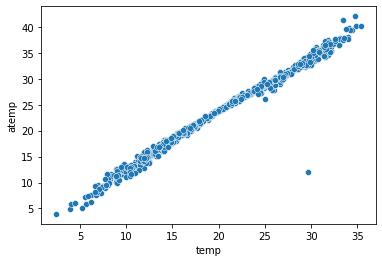

In [21]:
# Checking the trend between 'temp' and 'atemp'
sns.scatterplot(data=bsData, x='temp',y='atemp')
plt.show()

__One data point (outlier) which says temperature is around 30 but felt like 12 is highly suspecious data point need to check__

In [22]:
# finding ambigious entry
bsData[ (bsData.temp > 29) & (bsData.atemp < 13)]

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
593,fall,1,August,0,5,1,clear,29.656653,12.12,57.0833,15.500718,1483,5665,7148


<p style="color:maroon;font-weight:bold;background-color:yellow;width:max-content;"> 
    Here data point with temp = 29.65 and atemp = 12.12 is highly unlikely so droping this entry
</p>

In [23]:
bsData = bsData[ ~((bsData.temp > 29) & (bsData.atemp < 13))]
bsData.shape

(728, 14)

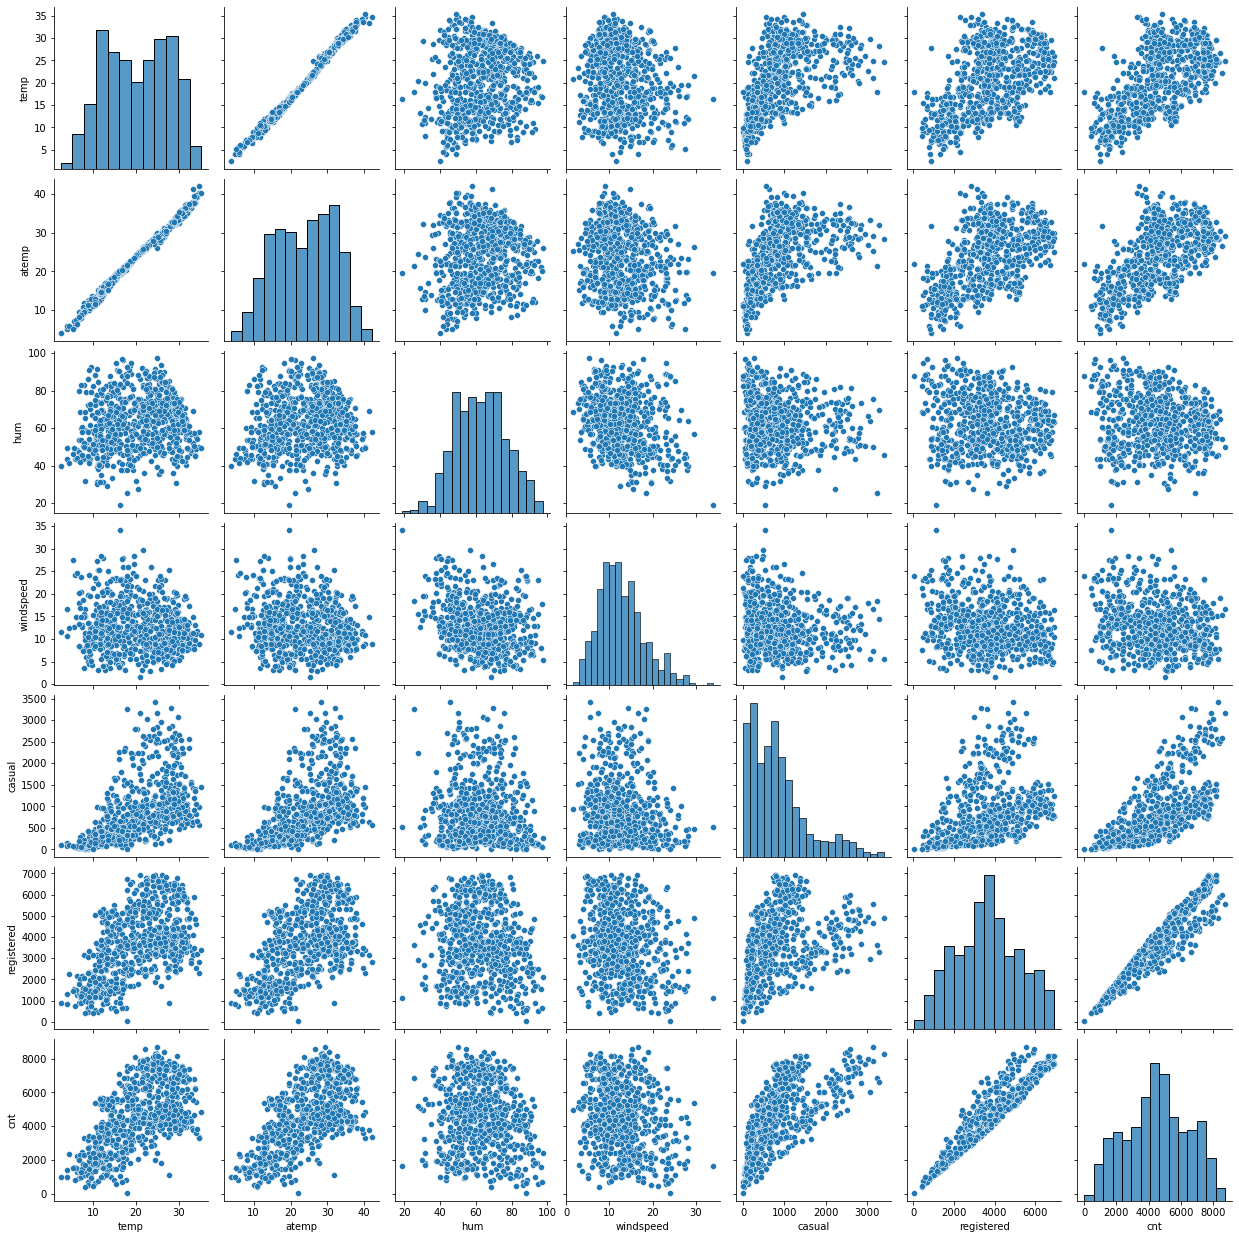

In [24]:
# Plotting relation between all the Numerical variables
sns.pairplot(bsData[["temp","atemp","hum","windspeed","casual","registered","cnt"]])
plt.show()

__1. There is a strong relation between 'registered' and 'cnt' variables.__<br>
__2. There is a good relation between 'casual' and 'cnt'variables.__<br>
__3. There is marginally good relation between 'atemp' and 'cnt' variables.__

### Derived columns

In [25]:
# All weekdays are not so much of importance in the analysis
# Can derive another variable called 'weekend' to identify whether the day is weekday or not 
# By visualising the data it seems 5 days working week is there and '6' means 'Saturday' and '0' means 'Sunday'
bsData['weekend'] = bsData.weekday.apply(lambda x: 1 if (x == 6) or (x == 0) else 0)

bsData.drop(['weekday'],axis=1, inplace=True)
bsData.head()

,season,yr,mnth,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,weekend
0,spring,0,January,0,0,cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985,1
1,spring,0,January,0,0,cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801,1
2,spring,0,January,0,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0
3,spring,0,January,0,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0
4,spring,0,January,0,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0


In [26]:
# temp and atemp variables are highly correlated that will cause colinearity issue it will be better to drop one of them
# lets drop temp column because atemp is something which people feels
bsData.drop(['temp'],axis=1,inplace=True)
bsData.head()

,season,yr,mnth,holiday,workingday,weathersit,atemp,hum,windspeed,casual,registered,cnt,weekend
0,spring,0,January,0,0,cloudy,18.18125,80.5833,10.749882,331,654,985,1
1,spring,0,January,0,0,cloudy,17.68695,69.6087,16.652113,131,670,801,1
2,spring,0,January,0,1,clear,9.47025,43.7273,16.636703,120,1229,1349,0
3,spring,0,January,0,1,clear,10.60610,59.0435,10.739832,108,1454,1562,0
4,spring,0,January,0,1,clear,11.46350,43.6957,12.522300,82,1518,1600,0


In [27]:
# cnt = casual + registered
# creating derived column casual_to_registered_ratio which contains info of how much casual changes as compared to 
# registered users
bsData["casual_to_registered_ratio"] = (bsData.casual / bsData.registered)

bsData.head()

,season,yr,mnth,holiday,workingday,weathersit,atemp,hum,windspeed,casual,registered,cnt,weekend,casual_to_registered_ratio
0,spring,0,January,0,0,cloudy,18.18125,80.5833,10.749882,331,654,985,1,0.506116
1,spring,0,January,0,0,cloudy,17.68695,69.6087,16.652113,131,670,801,1,0.195522
2,spring,0,January,0,1,clear,9.47025,43.7273,16.636703,120,1229,1349,0,0.097640
3,spring,0,January,0,1,clear,10.60610,59.0435,10.739832,108,1454,1562,0,0.074278
4,spring,0,January,0,1,clear,11.46350,43.6957,12.522300,82,1518,1600,0,0.054018


### Converting categorical variables into Numeric valriables (dummies)

In [28]:
# Getting dummy for 'season' variable
season_dummy = pd.get_dummies(bsData.season,drop_first=True)

# Getting dummy for 'mnth' variable
mnth_dummy = pd.get_dummies(bsData.mnth,drop_first=True)

# Getting dummy for 'weathersit' variable
weathersit_dummy = pd.get_dummies(bsData.weathersit,drop_first=True)

# Concat all the four dataset and get one dataset
bsData = pd.concat([bsData, season_dummy, mnth_dummy, weathersit_dummy] , axis=1)

# droping 'season' variable
bsData.drop(['season','weathersit','mnth'],axis=1,inplace=True)
bsData.head()

,yr,holiday,workingday,atemp,hum,windspeed,casual,registered,cnt,weekend,...,January,July,June,March,May,November,October,September,clear,cloudy
0,0,0,0,18.18125,80.5833,10.749882,331,654,985,1,...,1,0,0,0,0,0,0,0,0,1
1,0,0,0,17.68695,69.6087,16.652113,131,670,801,1,...,1,0,0,0,0,0,0,0,0,1
2,0,0,1,9.47025,43.7273,16.636703,120,1229,1349,0,...,1,0,0,0,0,0,0,0,1,0
3,0,0,1,10.60610,59.0435,10.739832,108,1454,1562,0,...,1,0,0,0,0,0,0,0,1,0
4,0,0,1,11.46350,43.6957,12.522300,82,1518,1600,0,...,1,0,0,0,0,0,0,0,1,0


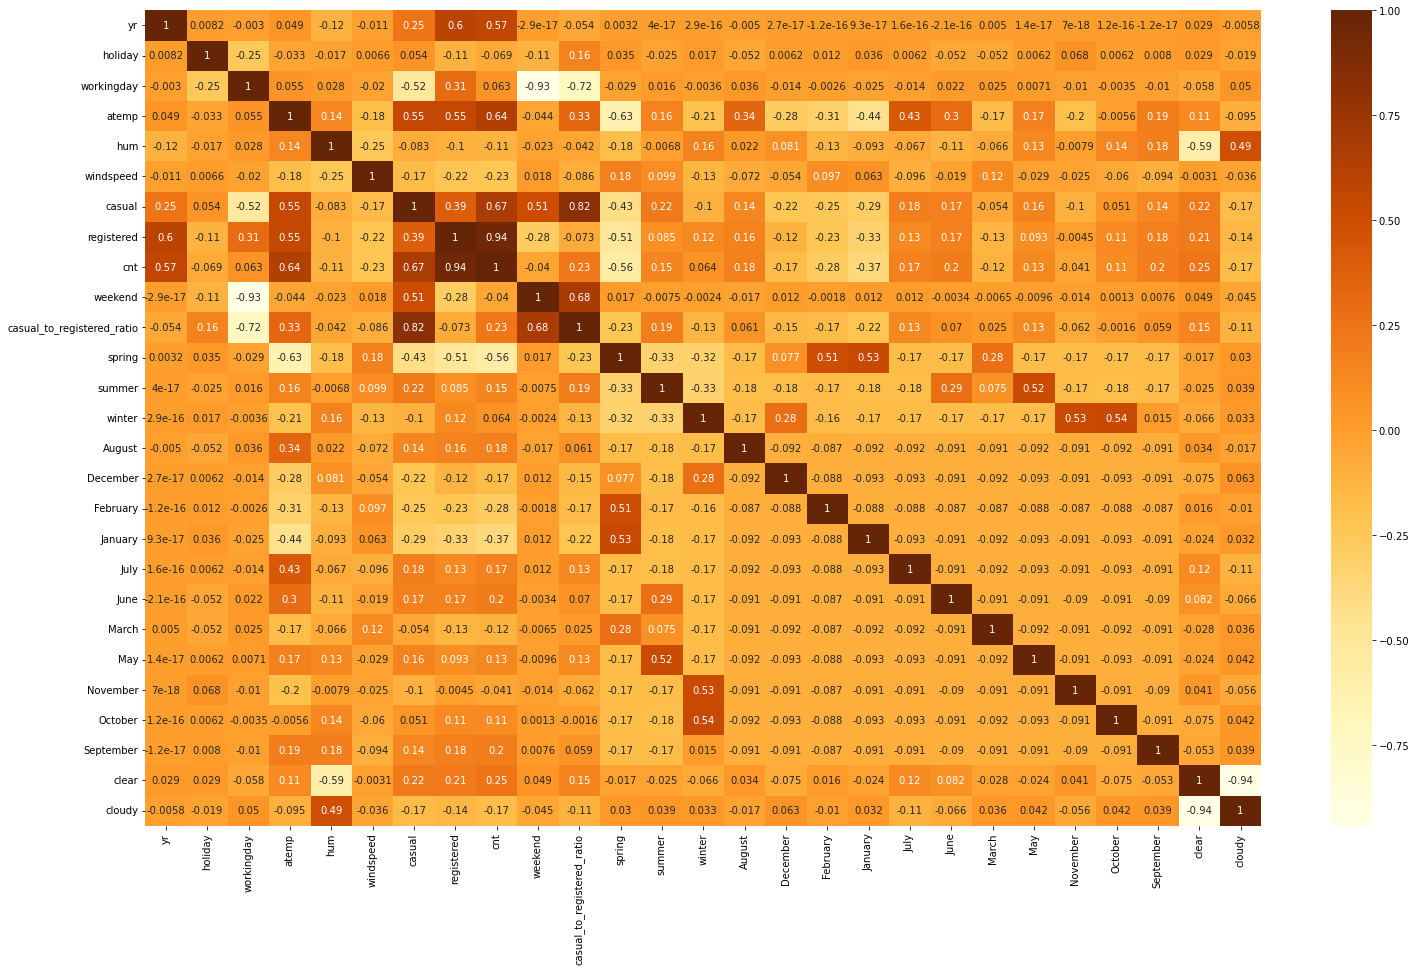

In [29]:
# Visualising Correlations
plt.figure(figsize=[25,15])
sns.heatmap(bsData.corr(), annot=True,cmap='YlOrBr')
plt.show()

__Observations:__<br>
__It feels like some of the variables have good correlation like:__
1. July and atemp
2. Cloudy and humidity
3. Winter and November, October
4. Summer and May, June
5. Spring and January and February
6. atemp and June, July, August
7. casual_to_register_ratio and Weekend


__It seems that the Months and the Seasons are strongly correlated with each other and can cause high Multicolinearity so it will be better if we can drop the "months" and keep seasons variables.__

In [30]:
# Dropping Month columns
bsData.drop([
    "January","February","March","May","June",
    "July","August","September","October","November","December"],
    axis=1,
    inplace=True)

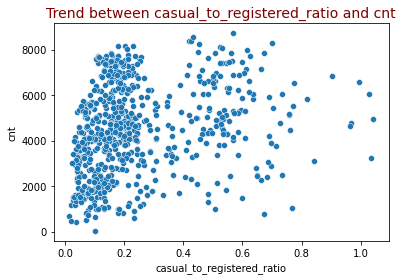

In [31]:
# Checking the trend between casual_to_regustered_ratio and cnt variables
sns.scatterplot(bsData.casual_to_registered_ratio, bsData.cnt)
plt.title("Trend between casual_to_registered_ratio and cnt",fontdict={"fontsize":14,"color":'maroon'})
plt.show()

__There is a weak trend between casual_to_registered_ratio and cnt variables__

In [32]:
# Dropping casual and registered varibales because they actually makes cnt variable 
# and we dont have control over those variables
bsData.drop(["casual","registered"], axis=1, inplace=True)

### Regression Model Building
<br>Using Forward regression model 

In [33]:
# Normalising the Numerical variables
scaler = MinMaxScaler()

trainData, testData = train_test_split(bsData, test_size=0.3, random_state=100)

np.random.seed(0)
# Scaling few numerical variables
num_vars = ['atemp', 'hum', 'windspeed', 'cnt']
trainData[num_vars] = scaler.fit_transform(trainData[num_vars])

# Extracting y_train 
y_train = trainData["cnt"]

# Defining a function to find VIF of model features
def find_vif(df, features):
    X_train = df[features]
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print("\n\n\nVIF:\n########\n",vif.to_string(index = False))
    

# Defining a function to create model considering N number of fields
def build_model(df, features):
    X_train = df[features]
    X_train_sm = sm.add_constant(X_train)
    modal = sm.OLS(y_train, X_train_sm).fit()
    return modal

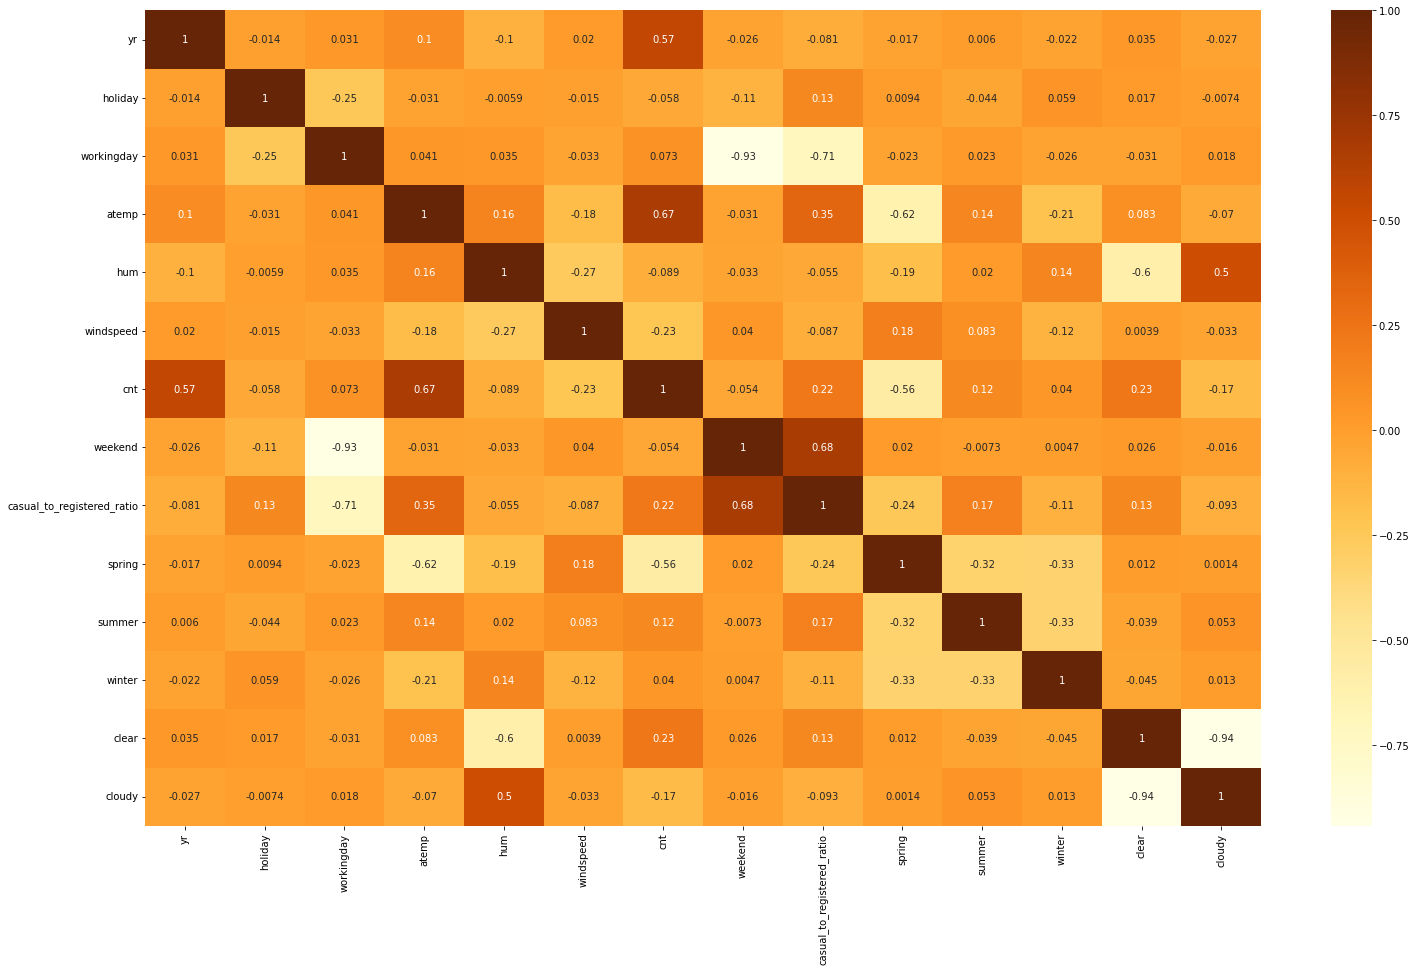

In [34]:
# Rebuilding the heatmap with train data
plt.figure(figsize=[25,15])
sns.heatmap(trainData.corr(), annot=True,cmap='YlOrBr')
plt.show()

In [35]:
# Considering only atemp as independent variable
print( build_model(trainData, ["atemp"]).summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                     413.1
Date:                Wed, 09 Feb 2022   Prob (F-statistic):           1.30e-67
Time:                        12:01:05   Log-Likelihood:                 193.29
No. Observations:                 509   AIC:                            -382.6
Df Residuals:                     507   BIC:                            -374.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1539      0.019      8.029      0.0

In [36]:
# including "atemp" and "yr"
features = ["atemp","yr"]

print(build_model(trainData, features).summary())

# Finding VIF
find_vif(trainData, features)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     589.7
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          6.21e-133
Time:                        12:01:05   Log-Likelihood:                 347.84
No. Observations:                 509   AIC:                            -689.7
Df Residuals:                     506   BIC:                            -677.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0677      0.015      4.583      0.0

__Observation: There is significant increase in $R^2$ and VIF is in control so keeping "yr"__

In [37]:
# including "atemp", "yr" and "spring"
features = ["atemp","yr", "spring"]

print( build_model(trainData, features).summary())

# Finding VIF
find_vif(trainData, features)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     493.2
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          1.28e-149
Time:                        12:01:05   Log-Likelihood:                 389.93
No. Observations:                 509   AIC:                            -771.9
Df Residuals:                     505   BIC:                            -754.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1905      0.019     10.164      0.0

__Observation: There is significant increase in $R^2$ and VIF is in control so keeping "spring"__

In [38]:
# including "atemp", "yr" "spring" and "clear"
features = ["atemp","yr","spring","clear"]

print( build_model(trainData, features).summary() )

# Finding VIF
find_vif(trainData, features)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     442.2
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          2.87e-163
Time:                        12:01:05   Log-Likelihood:                 424.94
No. Observations:                 509   AIC:                            -839.9
Df Residuals:                     504   BIC:                            -818.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1561      0.018      8.687      0.0

__Observation: There is significant increase in $R^2$ and VIF in control so keeping "clear"__

In [39]:
# Considering "atemp","yr","spring","clear", "windspeed"
features = ["atemp","yr","spring","clear", "windspeed"]

print( build_model(trainData, features).summary())

# Finding VIF
find_vif(trainData, features)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     380.2
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          2.93e-168
Time:                        12:01:05   Log-Likelihood:                 439.74
No. Observations:                 509   AIC:                            -867.5
Df Residuals:                     503   BIC:                            -842.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2068      0.020     10.464      0.0

__Observation: There is good increase in $R^2$ and VIF is there in limit so keeping "windspeed"__

In [40]:
# Considering "atemp","yr","spring","clear", "windspeed","casual_to_registered_ratio"
features = ["atemp","yr","spring","clear", "windspeed","casual_to_registered_ratio"]

print( build_model(trainData, features).summary() )

# Finding VIF
find_vif(trainData, features)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     317.4
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          2.84e-167
Time:                        12:01:05   Log-Likelihood:                 440.49
No. Observations:                 509   AIC:                            -867.0
Df Residuals:                     502   BIC:                            -837.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

__Observation: There is minor increase in $R^2$ and P(casual_to_registered_ratio) is insignificant and also VIF getting out of bounds so removing "casual_to_registered_ratio".__

In [41]:
# including "atemp","yr","spring","clear", "windspeed","cloudy"
features = ["atemp","yr","spring","clear", "windspeed","cloudy"]

print( build_model(trainData, features).summary() )

# Finding VIF
find_vif(trainData, features)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     355.4
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          4.07e-177
Time:                        12:01:05   Log-Likelihood:                 463.52
No. Observations:                 509   AIC:                            -913.0
Df Residuals:                     502   BIC:                            -883.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0303      0.031      0.964      0.3

__Observation: Clear and Cloudy have strong colinearity which is causing high VIF value. So, droping "cloudy"__

In [42]:
# Considering "atemp","yr","spring","clear", "windspeed","summer"
features = ["atemp","yr","spring","clear", "windspeed","summer"]

print( build_model(trainData, features).summary() )

# Finding VIF
find_vif(trainData, features)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     316.4
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          5.18e-167
Time:                        12:01:05   Log-Likelihood:                 439.89
No. Observations:                 509   AIC:                            -865.8
Df Residuals:                     502   BIC:                            -836.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2087      0.020     10.387      0.0

__Observation: There is no increase in $R^2$ and P(summer) is very high so removing "summer"__

In [43]:
# Considering "atemp","yr","spring","clear", "windspeed","hum"
features = ["atemp","yr","spring","clear", "windspeed","hum"]

print( build_model(trainData, features).summary() )

# Finding VIF
find_vif(trainData, features)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     337.1
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          1.72e-172
Time:                        12:01:05   Log-Likelihood:                 452.71
No. Observations:                 509   AIC:                            -891.4
Df Residuals:                     502   BIC:                            -861.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3335      0.031     10.634      0.0

__Observation: There is small increase in $R^2$ but inclusion of "hum" increased VIF so droping "hum"__

In [44]:
# Considering "atemp","yr","spring","clear", "windspeed","winter"
features = ["atemp","yr","spring","clear", "windspeed","winter"]

print( build_model(trainData, features).summary() )

# Finding VIF
find_vif(trainData, features)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     321.3
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          2.49e-168
Time:                        12:01:05   Log-Likelihood:                 442.97
No. Observations:                 509   AIC:                            -871.9
Df Residuals:                     502   BIC:                            -842.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1653      0.026      6.461      0.0

__Observation: There is very less increase in $R^2$. excldinng "winter" field__

In [45]:
# Considering "atemp","yr","spring","clear", "windspeed","weekend"
features = ["atemp","yr","spring","clear", "windspeed","weekend"]

print( build_model(trainData, features).summary() )

# Finding VIF
find_vif(trainData, features)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     317.2
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          3.32e-167
Time:                        12:01:05   Log-Likelihood:                 440.34
No. Observations:                 509   AIC:                            -866.7
Df Residuals:                     502   BIC:                            -837.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2100      0.020     10.513      0.0

__Observation: There is very less increase in $R^2$. excludinng "weekend" field__

In [46]:
# including "atemp","yr","spring","clear", "windspeed","workingday"
features = ["atemp","yr","spring","clear", "windspeed","workingday"]

print( build_model(trainData, features).summary() )

# Finding VIF
find_vif(trainData, features)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     318.7
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          1.23e-167
Time:                        12:01:05   Log-Likelihood:                 441.35
No. Observations:                 509   AIC:                            -868.7
Df Residuals:                     502   BIC:                            -839.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1955      0.021      9.439      0.0

__Observation: There is little increase in $R^2$. Inclusion of "workingday" increases the VIF so dropping__

In [47]:
# including "atemp","yr","spring","clear", "windspeed","holiday"
features = ["atemp","yr","spring","clear", "windspeed","holiday"]

print( build_model(trainData, features).summary() )

# Finding VIF
find_vif(trainData, features)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     319.4
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          8.29e-168
Time:                        12:01:06   Log-Likelihood:                 441.75
No. Observations:                 509   AIC:                            -869.5
Df Residuals:                     502   BIC:                            -839.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2096      0.020     10.611      0.0

__Observation: There is little increase in $R^2$. Inclusion of "holiday" increases the VIF so dropping__

## Final Model

In [48]:
# Model with atemp, yr, spring, clear and windspeed variables found to be optimal one
# So in Final model including above mentioned variables
features = ["atemp","yr","spring","clear", "windspeed"]
modal = build_model(trainData, features)
modal.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     380.2
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          2.93e-168
Time:                        12:01:06   Log-Likelihood:                 439.74
No. Observations:                 509   AIC:                            -867.5
Df Residuals:                     503   BIC:                            -842.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2068      0.020     10.464      0.000       0.168       0.246
atemp          0.4102      0.026     15.546      0.000       0.358       0.462
yr             0.2301      0.009     25.099      0.000       0.212       0.248
spring        -0.1442      0.014    -10.601      0.000      -0.171      -0.118
clear          0.0841      0.009      8.923      0.000       0.066       0.103
windspeed     -0.1466      0.027     -5.488      0.000      -0.199      -0.094
==============================================================================
Omnibus:                       94.159   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              249.582
Skew:                          -0.913   Prob(JB):                     6.37e-55
Kurtosis:                       5.905   Cond. No.                         11.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<p style="color:maroon;font-weight:bold;background-color:yellow;width:max-content;">
The trainig model with variables "atemp", "yr", "spring", "windspeed" and "clear" describe 79.1% of the variance.
</p>

### Residual analysis

(509,)


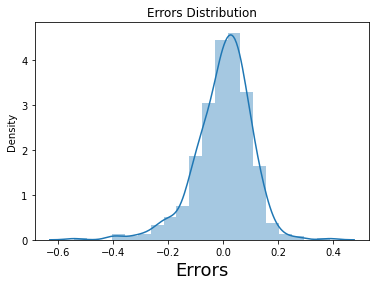

In [49]:
# Predicting the output for train data
print(y_train.shape)
X_train_sm = sm.add_constant(trainData[features])
y_train_pred = modal.predict(X_train_sm)

# Plot the histogram of the error terms
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.title('Errors Distribution')
plt.show()

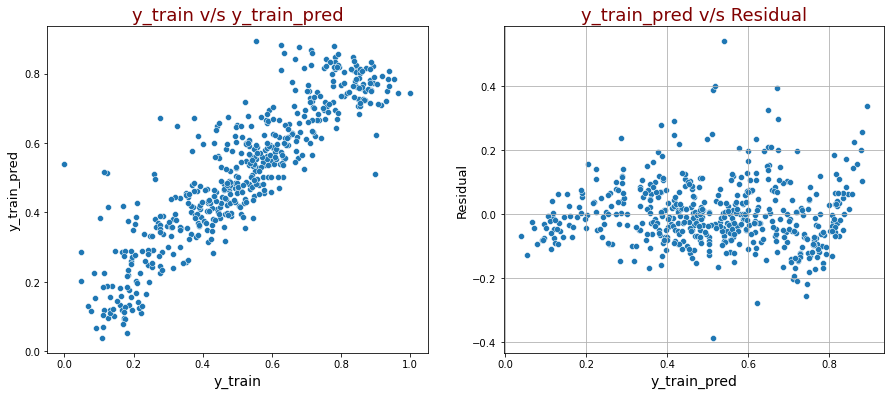

In [50]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.scatterplot(y_train,y_train_pred)
plt.xlabel('y_train', fontsize=14)
plt.ylabel('y_train_pred', fontsize=13) 
plt.title("y_train v/s y_train_pred",fontdict={"fontsize":18,"color":"Maroon"})


plt.subplot(1,2,2)
sns.scatterplot(y_train_pred,y_train_pred - y_train)
plt.xlabel('y_train_pred', fontsize=14) 
plt.ylabel('Residual', fontsize=13) 
plt.title("y_train_pred v/s Residual",fontdict={"fontsize":18,"color":"Maroon"})
plt.grid()
plt.show()

### Predictions of the test model

In [51]:
# Transforming the test data on Training scale
testData[num_vars] = scaler.transform(testData[num_vars])

In [52]:
y_test = testData.cnt
X_test = testData[features]

# adding constants to test data
X_test_sm = sm.add_constant(X_test)
# Predicting the output values
y_test_pred = modal.predict(X_test_sm)

# Calculating the R^2 vaue on the test data set
print("R^2 for test data: ",r2_score(y_test, y_test_pred))

R^2 for test data:  0.7800893739249961


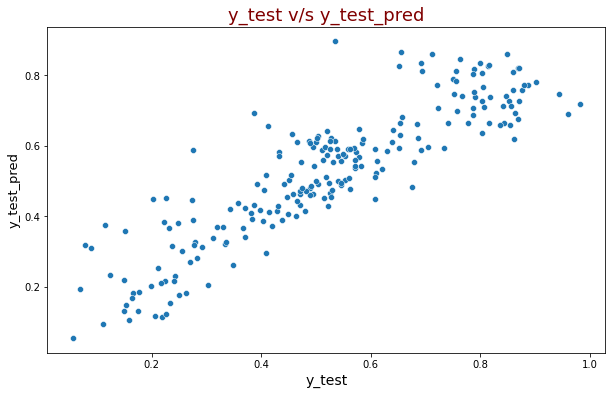

In [53]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure(figsize=(10,6))
sns.scatterplot(y_test,y_test_pred)
plt.xlabel('y_test', fontsize=14)
plt.ylabel('y_test_pred', fontsize=13) 
plt.title("y_test v/s y_test_pred",fontdict={"fontsize":18,"color":"Maroon"})
plt.show()

<h1 style="color:Green;">Conclusions</h1>

1. Model trained on <i style="color:red;font-weight:bold;">__$R^2$=0.791__</i> and <i style="color:red;font-weight:bold;">__$adj(R^2)$=0.789__</i>
2. Tested data with model and got <i style="color:red;font-weight:bold;">__$R^2$=0.78__</i>
3. As __temperature__ increases and weather is __clear__ then the relation is positive means bike sales __increases__ but if the weather is __bad__ people don't rent bikes at that time we can decrease the price of the bikes which might result in increase of bike rentals.
4. Bike sales are __increasing yearly__ as the number of casual and registered users are __increasing__.
5. In __spring__ people prefer to walk. So we can increase price in summer and winter and decrease in spring.
6. If the windspeed increases the bike rentals decreases.
<br><br><br>
__Business Significance of Variables:__<br>
Price and marketing are such variables which directly relates to bike rental but those variables are not present in the dataset. So we can look for variables which can be controlled to have indirect impact on rent price and marketing which can be __weather__ and __temperature__.
    <br>a. When temperature increases then customers (demand) increases, So increase the rental price at that time.
    <br>b. When the weather is clear then increase the rental price and when whether is bad decrease it.
    <br>c. Specially in spring season decrease the rental price because in that season bike sale decreases.